# Libraries

In [1]:
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

# plot style
plt.style.use("seaborn-v0_8")
# print(plt.style.available)

# the "R4" palette
_colours = ["#000000f0", "#DF536Bf0", "#61D04Ff0", "#2297E6f0",
            "#28E2E5f0", "#CD0BBCf0", "#F5C710f0", "#999999f0"]

_linestyles = ["solid", "dashed", "dashdot", "dotted"]

# A different plotting style for each plotted line
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=_colours, linestyle=_linestyles*2)
plt.rcParams["patch.facecolor"] = _colours[0]

# Python version
import sys
print(f"sys: {sys.version}")
print(f"numpy: {np.__version__}")
print(f"scipy: {scipy.__version__}")
print(f"pandas: {pd.__version__}")
print(f"matplotlib: {matplotlib.__version__}")
print(f"seaborns {sns.__version__}")

sys: 3.9.5 (tags/v3.9.5:0a7dcbd, May  3 2021, 17:27:52) [MSC v.1928 64 bit (AMD64)]
numpy: 1.24.2
scipy: 1.10.1
pandas: 1.5.3
matplotlib: 3.7.1
seaborns 0.12.2


# Load data

In [2]:
heights = np.loadtxt("data/nhanes_adult_female_height_2020.txt")
income = np.loadtxt("data/uk_income_simulated_2020.txt")

In [3]:
print(f"Lenght heights: {len(heights)}")

Lenght heights: 4221


# Plot distribution

In [4]:
mu = np.mean(heights)

# ddof: Delta Degrees of Freedom, that is the divisor used 
# in calculations is "N - ddof", where N represents the number 
# of elements. By default ddof is zero.
# In this context, we use ddof=1, because this estimator has
# slightly better statistical properties.
sigma = np.std(heights, ddof=1)

print(mu, sigma)

160.13679222932953 7.062858532891359


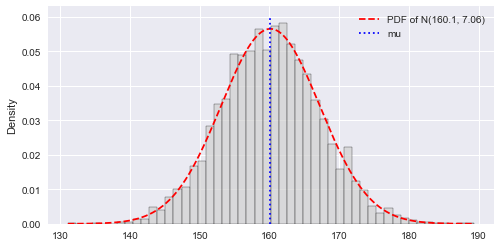

In [5]:
plt.figure(figsize=(8, 4))
# stat="density" = the histogram bars are normalised (total area sums to 1)
sns.histplot(heights, stat="density", color="lightgray")
x = np.linspace(np.min(heights), np.max(heights), 1000)
plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma), "r--", label=f"PDF of N({mu:.1f}, {sigma:.2f})")
plt.vlines(mu, 0, 0.06, colors="b", linestyles="dotted", label="mu")
plt.legend()
plt.show()

# Assessing Goodness-of-Fit

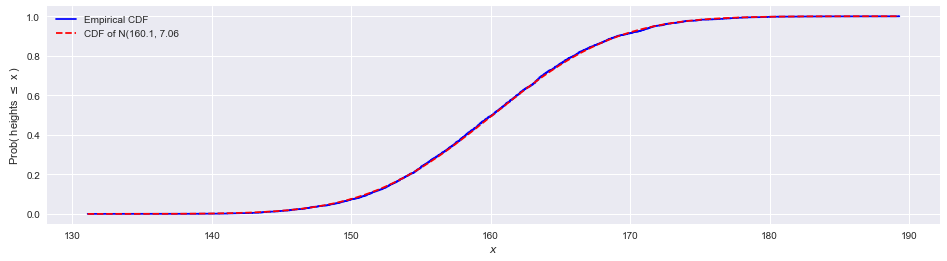

In [6]:
# Measure the discrepancy between:
# 1) A theoretical cumulative distribution function (CDF)
# 2) The empirical cumulative distribution function (CDF)
x = np.linspace(np.min(heights), np.max(heights), 1000)
probs = scipy.stats.norm.cdf(x, mu, sigma) # sample the CDF
heights_sorted = np.sort(heights)
n = len(heights)

plt.figure(figsize=(16, 4))

plt.plot(heights_sorted, np.arange(1, n+1)/n, "b", drawstyle="steps-post", label="Empirical CDF")
plt.plot(x, probs, "r--", label=f"CDF of N({mu:.1f}, {sigma:.2f}")
plt.xlabel("$x$")
plt.ylabel("Prob( heights $\\leq$ x )")
plt.legend()
plt.show()

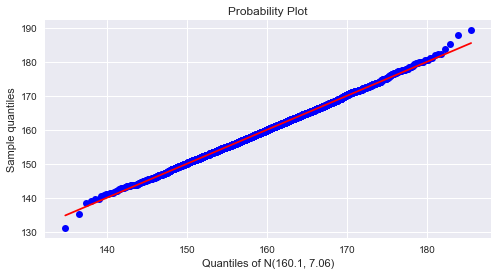

In [7]:
# Q-Q plot (quantile-quantile or probability plot)

mu = np.mean(heights)
sigma = np.std(heights, ddof=1)

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(111)

# Calculate quantiles for a probability plot and show the plot
res = scipy.stats.probplot(heights, dist='norm', sparams=(mu, sigma), plot=ax)

plt.xlabel(f"Quantiles of N({mu:.1f}, {sigma:.2f})")
plt.ylabel(f"Sample quantiles")
plt.show()

# Log-normal

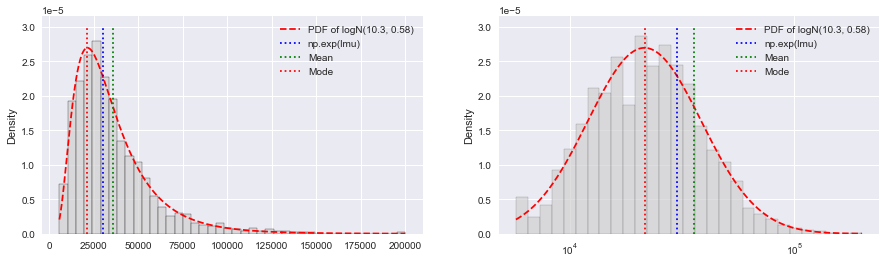

In [8]:
lmu = np.mean(np.log(income))
lsigma = np.std(np.log(income), ddof=1)
f_mean = np.exp(lmu + ((lsigma**2)/2))
f_mode = np.exp(lmu - lsigma**2)

x = np.linspace(np.min(income), np.max(income), 1000)

# scipy.stats.lognorm uses parameter:
# s = standard deviation of log(x)
# scale = exp( mean( log(x) ) )
fx = scipy.stats.lognorm.pdf(x, scale=np.exp(lmu), s=lsigma)

plt.figure(figsize=(15, 4))

plt.subplot(121)
# stat="density" = the histogram bars are normalised (total area sums to 1)
sns.histplot(income, stat="density", color="lightgray")
plt.plot(x, fx, "r--", label=f"PDF of logN({lmu:.1f}, {lsigma:.2f})")
plt.vlines(np.exp(lmu), 0, 3e-5, colors="b", linestyles="dotted", label="np.exp(lmu)")
plt.vlines(f_mean, 0, 3e-5, colors="g", linestyles="dotted", label="Mean")
plt.vlines(f_mode, 0, 3e-5, colors="r", linestyles="dotted", label="Mode")
plt.legend()

plt.subplot(122)
b = np.geomspace(np.min(income), np.max(income), 30)
# stat="density" = the histogram bars are normalised (total area sums to 1)
sns.histplot(income, stat="density", bins=b, color="lightgray")
plt.plot(x, fx, "r--", label=f"PDF of logN({lmu:.1f}, {lsigma:.2f})")
plt.vlines(np.exp(lmu), 0, 3e-5, colors="b", linestyles="dotted", label="np.exp(lmu)")
plt.vlines(f_mean, 0, 3e-5, colors="g", linestyles="dotted", label="Mean")
plt.vlines(f_mode, 0, 3e-5, colors="r", linestyles="dotted", label="Mode")
plt.xscale("log")
plt.legend()

plt.show()

Fraction of people with earnings below the mean = 0.62
Fraction of people with earnings below the median = 0.5


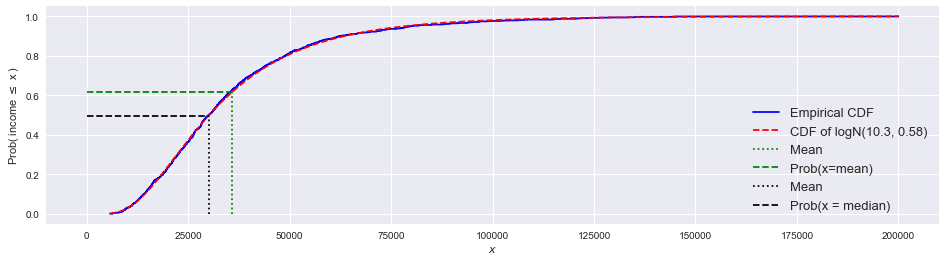

In [9]:
# Measure the discrepancy between:
# 1) A theoretical cumulative distribution function (CDF)
# 2) The empirical cumulative distribution function (CDF)
lmu = np.mean(np.log(income))
lsigma = np.std(np.log(income), ddof=1)
x = np.linspace(np.min(income), np.max(income), 1000)
probs = scipy.stats.lognorm.cdf(x, lsigma, loc=0, scale=np.exp(lmu))
income_sorted = np.sort(income)
n = len(income)

plt.figure(figsize=(16, 4))
plt.plot(income_sorted, np.arange(1, n+1)/n, "b", drawstyle="steps-post", label="Empirical CDF")
plt.plot(x, probs, "r--", label=f"CDF of logN({lmu:.1f}, {lsigma:.2f})")
plt.xlabel("$x$")
plt.ylabel("Prob( income $\\leq$ x )")

y1 = scipy.stats.lognorm.cdf(np.mean(income), lsigma, loc=0, scale=np.exp(lmu))
plt.vlines(np.mean(income), 0, y1, colors="g", linestyles="dotted", label="Mean")
plt.hlines(y1, 0, np.mean(income), colors="g", linestyles="dashed", label="Prob(x=mean)")
print(f"Fraction of people with earnings below the mean = {round(y1, 2)}")

y1 = scipy.stats.lognorm.cdf(np.median(income), lsigma, loc=0, scale=np.exp(lmu))
plt.vlines(np.median(income), 0, y1, colors="k", linestyles="dotted", label="Mean")
plt.hlines(y1, 0, np.median(income), colors="k", linestyles="dashed", label="Prob(x = median)")
print(f"Fraction of people with earnings below the median = {round(y1, 2)}")

plt.legend(loc="lower right", fontsize=13)
plt.show()

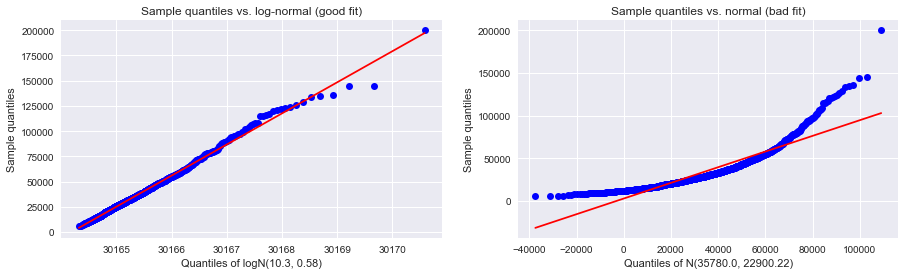

In [10]:
# Q-Q plot (quantile-quantile or probability plot)

mu = np.mean(income)
sigma = np.std(income, ddof=1)

lmu = np.mean(np.log(income))
lsigma = np.std(np.log(income), ddof=1)

fig = plt.figure(figsize=(15, 4))

# plot sample quantiles vs. log-normal
ax = fig.add_subplot(121)
scipy.stats.probplot(income, dist=scipy.stats.lognorm, sparams=(lsigma, np.exp(lmu)), plot=ax)
plt.xlabel(f"Quantiles of logN({lmu:.1f}, {lsigma:.2f})")
plt.ylabel(f"Sample quantiles")
plt.title("Sample quantiles vs. log-normal (good fit)")

# plot sample quantiles vs. normal
ax = fig.add_subplot(122)
scipy.stats.probplot(income, dist='norm', sparams=(mu, sigma), plot=ax)
plt.xlabel(f"Quantiles of N({mu:.1f}, {sigma:.2f})")
plt.ylabel(f"Sample quantiles")
plt.title("Sample quantiles vs. normal (bad fit)")

plt.show()